<a href="https://colab.research.google.com/github/KhangTran2503/CS114.K21.KHTN/blob/master/CS114_CloudVisionAPI_Demo_18520072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

In [0]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.join(os.curdir, 'CS114-18520072.json') 

!echo $GOOGLE_APPLICATION_CREDENTIALS

!cat $GOOGLE_APPLICATION_CREDENTIALS


In [0]:
!pip install --upgrade google-cloud-vision

In [0]:
from google.colab.patches import cv2_imshow
import cv2
import os

def download_view(img_url):
  img_file = os.path.basename(img_url)
  !curl -o $img_file $img_url
  img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  return img_file

https://i.postimg.cc/05FfBPpc/43586869-2124273481223094-2225645150774755328-o.jpg
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  299k  100  299k    0     0   982k      0 --:--:-- --:--:-- --:--:--  982k


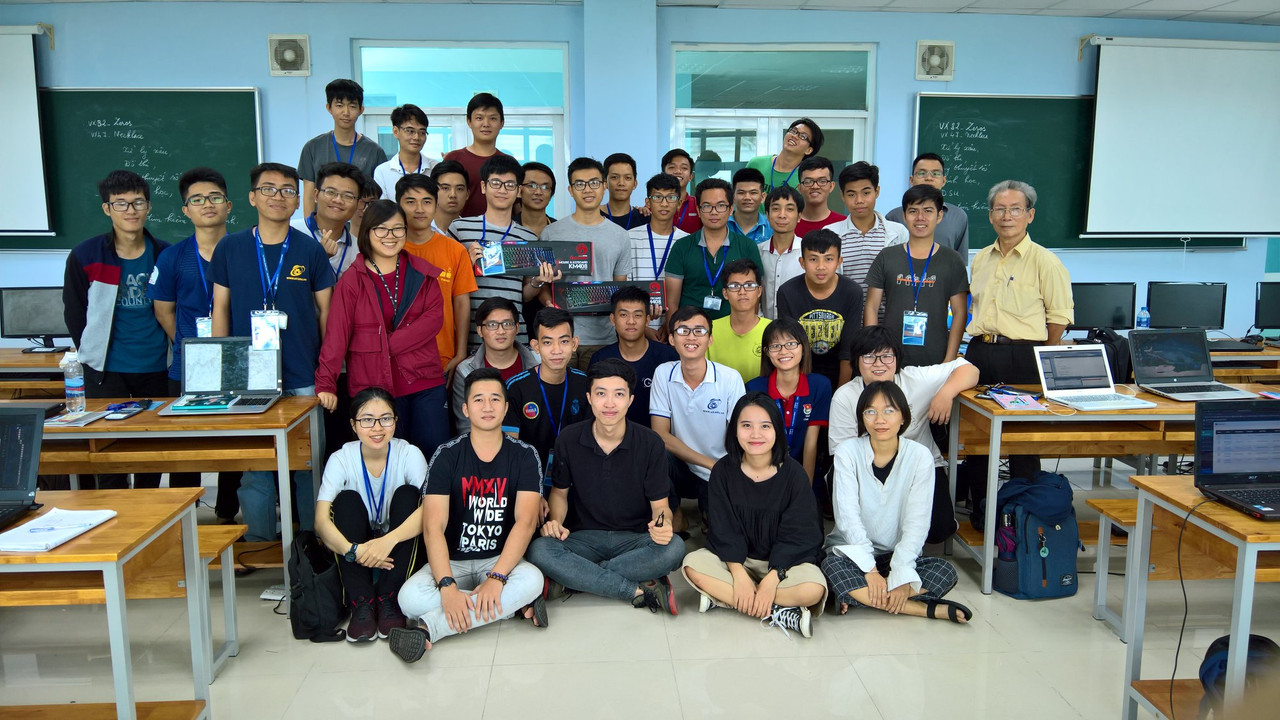

43586869-2124273481223094-2225645150774755328-o.jpg


In [11]:
#  title Nhập URL

img_url = "https://i.postimg.cc/05FfBPpc/43586869-2124273481223094-2225645150774755328-o.jpg" #param {type:"string"}

print(img_url)
img_file = download_view(img_url)
print(img_file)



In [0]:
# https://cloud.google.com/vision/docs/face-tutorial

def detect_face(face_file, max_results=20):
    """Uses the Vision API to detect faces in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of Face objects with information about the picture.
    """
    client = vision.ImageAnnotatorClient()

    content = face_file.read()
    image = types.Image(content=content)

    return client.face_detection(
        image=image, max_results=max_results).face_annotations

In [0]:
def highlight_faces(image, faces, output_filename):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    im = Image.open(image)
    draw = ImageDraw.Draw(im)
    # Sepecify the font-family and the font-size
    for face in faces:
        box = [(vertex.x, vertex.y)
               for vertex in face.bounding_poly.vertices]
        draw.line(box + [box[0]], width=5, fill='#00ff00')
        # Place the confidence value/score of the detected faces above the
        # detection box in the output image
        draw.text(((face.bounding_poly.vertices)[0].x,
                   (face.bounding_poly.vertices)[0].y - 30),
                  str(format(face.detection_confidence, '.3f')) + '%',
                  fill='#FF0000')
    im.save(output_filename)

Found 38 faces
Writing to file 43586869-2124273481223094-2225645150774755328-o.jpg.facedet.jpg


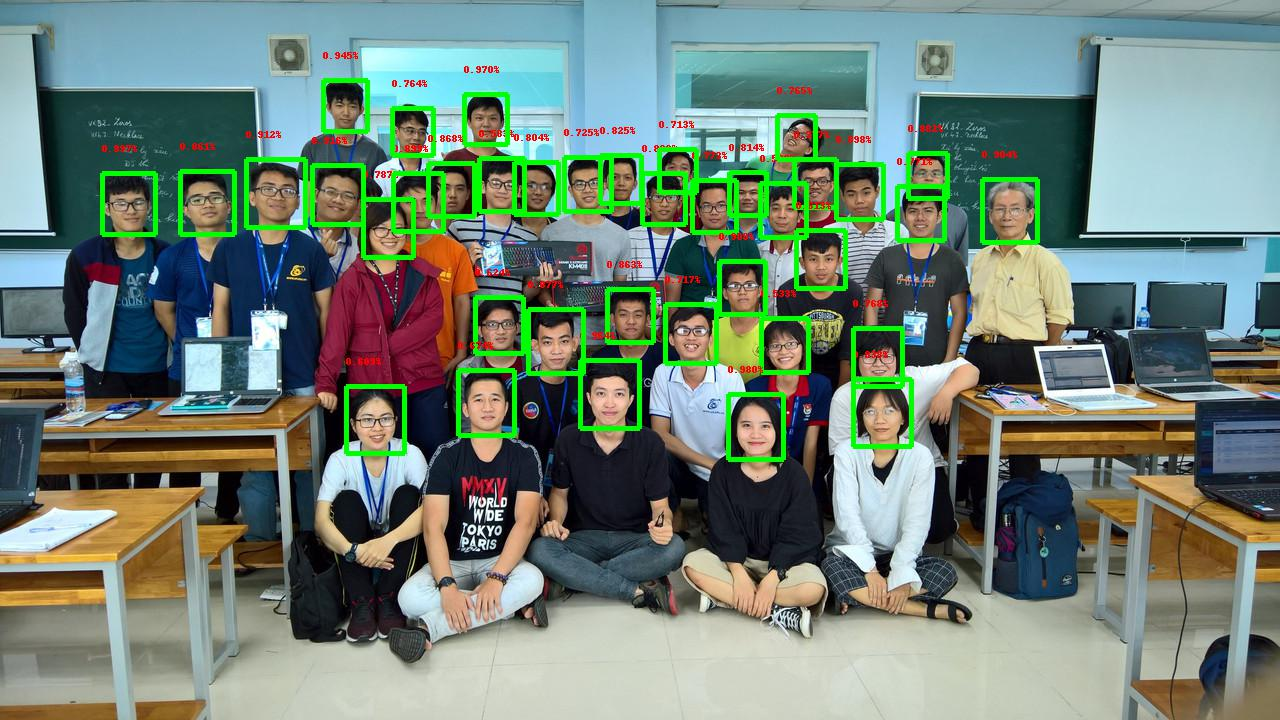

In [24]:
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow
import cv2

output_filename = img_file + '.facedet.jpg'
max_results = 40

with open(img_file, 'rb') as image:
    faces = detect_face(image, max_results)
    print('Found {} face{}'.format(
        len(faces), '' if len(faces) == 1 else 's'))

    print('Writing to file {}'.format(output_filename))
    # Reset the file pointer, so we can read the file again
    image.seek(0)
    highlight_faces(image, faces, output_filename)
    img = cv2.imread(output_filename, cv2.IMREAD_UNCHANGED)
    cv2_imshow(img)


In [0]:
from google.cloud import vision

def detect_faces_uri(uri):
    """Detects faces in the file located in Google Cloud Storage or the web."""
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')

    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [26]:
detect_faces_uri(img_url)


Faces:
anger: VERY_UNLIKELY
joy: UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (475,297),(523,297),(523,353),(475,353)
anger: VERY_UNLIKELY
joy: UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (692,180),(736,180),(736,232),(692,232)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (479,158),(524,158),(524,211),(479,211)
anger: VERY_UNLIKELY
joy: LIKELY
surprise: VERY_UNLIKELY
face bounds: (564,157),(611,157),(611,211),(564,211)
anger: VERY_UNLIKELY
joy: LIKELY
surprise: VERY_UNLIKELY
face bounds: (982,179),(1037,179),(1037,242),(982,242)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (761,318),(808,318),(808,372),(761,372)
anger: VERY_UNLIKELY
joy: UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (323,80),(367,80),(367,131),(323,131)
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (607,289),(653,289),(653,342),(607,342)
anger: VERY_UNLIKELY
joy: LIKELY
surprise: VERY_UNLIKELY
face bounds: (853,379),(911,379),